In [114]:
%matplotlib inline
import datetime
import calendar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = [15, 6]
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
url = 'https://docs.google.com/spreadsheets/d/1-MEOxWn6VeUgFgjzoIRY-d6teP5xS_fr34X5cldbwwY/export?gid=0&format=csv'
data = pd.read_csv(url, error_bad_lines=False)
data.head()

,User,Date,Day of Week,# in Line,Line-up Time,Pick-up Time,Notes
0,Victor,6/8/2016,Wednesday,19,7:50:00 AM,8:05:00 AM,NaN
1,Victor,6/9/2016,Thursday,4,7:26:00 AM,7:29:00 AM,NaN
2,Mikaela,6/9/2016,Thursday,19,8:01:00 AM,8:21:00 AM,Bus arrived as I got in line
3,Victor,6/10/2016,Friday,9,7:30:00 AM,7:38:00 AM,NaN
4,Mikaela,6/10/2016,Friday,21,7:50:00 AM,8:00:00 AM,Took the bus after 10 minutes


In [3]:
data['timestamp_arrive'] = pd.to_datetime(data['Date']+' '+data['Line-up Time'])

In [4]:
data['timestamp_depart'] = pd.to_datetime(data['Date']+' '+data['Line-up Time'])

In [5]:
data = data.rename(columns={'User':'user',
                            'Day of Week':'weekday',
                            '# in Line':'count',
                            'Notes':'notes'})

In [6]:
data = data.drop(['Date', 'Line-up Time', 'Pick-up Time'], axis=1)

In [7]:
data.head()

,user,weekday,count,notes,timestamp_arrive,timestamp_depart
0,Victor,Wednesday,19,NaN,2016-06-08 07:50:00,2016-06-08 07:50:00
1,Victor,Thursday,4,NaN,2016-06-09 07:26:00,2016-06-09 07:26:00
2,Mikaela,Thursday,19,Bus arrived as I got in line,2016-06-09 08:01:00,2016-06-09 08:01:00
3,Victor,Friday,9,NaN,2016-06-10 07:30:00,2016-06-10 07:30:00
4,Mikaela,Friday,21,Took the bus after 10 minutes,2016-06-10 07:50:00,2016-06-10 07:50:00


In [92]:
df = data[['count', 'timestamp_arrive']]
df['timestamp'] = df['timestamp_arrive'].apply(lambda x: x.replace(month=1, day=1, year=2017))
df = df.set_index('timestamp')
df = df.sort_index()
df = df.drop('timestamp_arrive', axis=1)
df.head()

/Users/victormora/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,count
timestamp,
2017-01-01 06:37:00,2
2017-01-01 06:54:00,0
2017-01-01 07:01:00,1
2017-01-01 07:01:00,0
2017-01-01 07:09:00,0


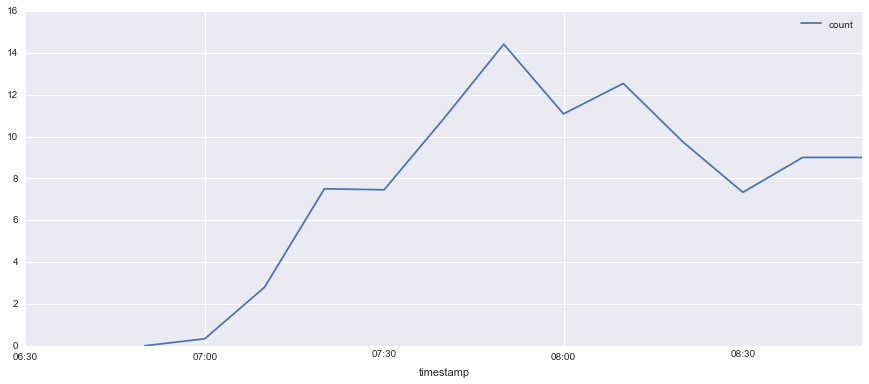

In [102]:
grp = df.groupby(pd.TimeGrouper(freq='10min'))
grp.mean().plot()

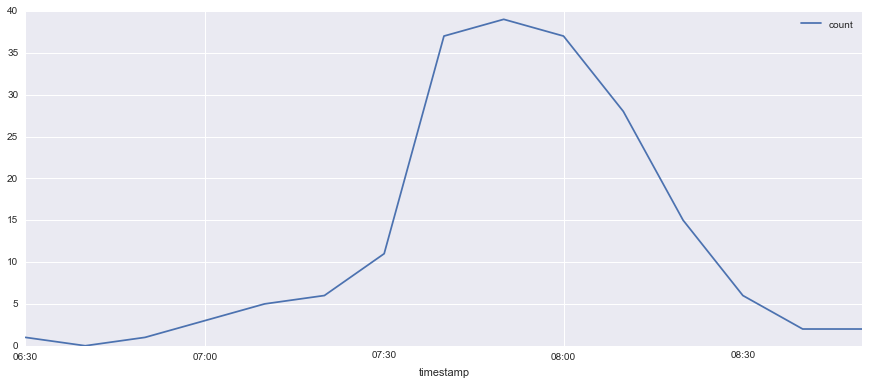

In [104]:
grp.count().plot()

In [137]:
def plt_wkday(weekday):
    df = data[data['weekday'] == weekday][['count', 'timestamp_arrive']]
    df['timestamp'] = df['timestamp_arrive'].apply(lambda x: x.replace(month=1, day=1, year=2017))
    df = df.set_index('timestamp')
    df = df.sort_index()
    df = df.drop('timestamp_arrive', axis=1)
    grp = df.groupby(pd.TimeGrouper(freq='10min')).mean()
    grp.index = grp.index.time
#     grp = grp.round()
    print(weekday+' Average')
    print(grp)
#     return grp.mean().plot(), grp.count().plot()

In [112]:
weekday = calendar.day_name[date.today().weekday()]

In [138]:
plt_wkday(weekday)

Monday Average
          count
07:20:00  12.00
07:30:00    nan
07:40:00  15.12
07:50:00  22.25
08:00:00  13.00
08:10:00  21.50
08:20:00    nan
08:30:00   0.00
08:40:00  12.00


(<matplotlib.axes._subplots.AxesSubplot at 0x120c36630>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12114f940>)

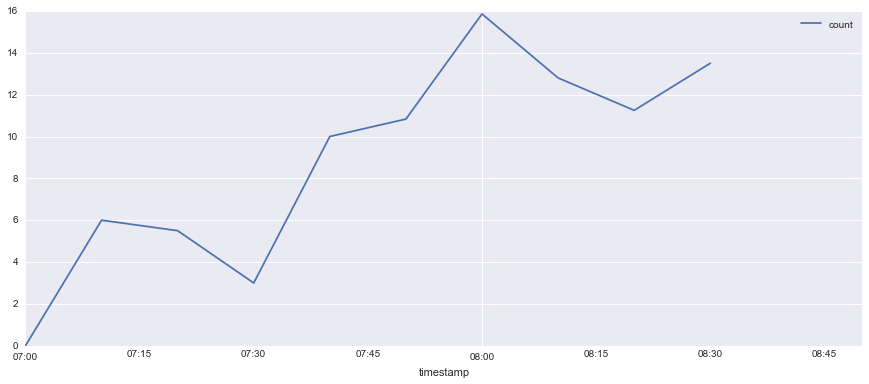

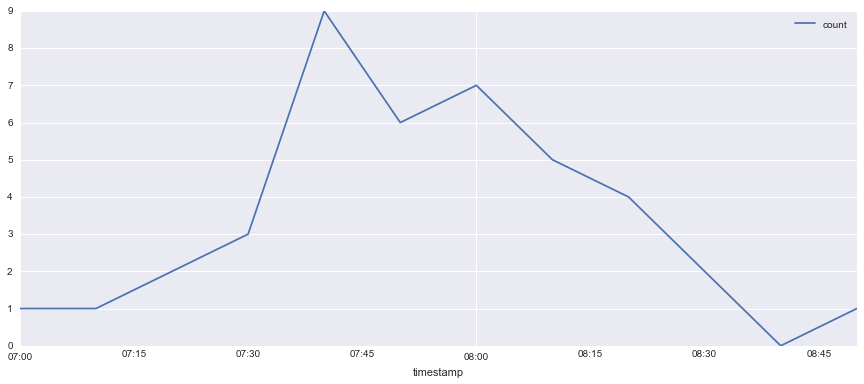

In [109]:
plt_wkday('Thursday')